# 住宅販売データの学習

In [120]:
# 正規の提出日後、アドバイスをいただいたので、改善策を試みました。
# 中盤に正規提出の際のまとめ１、末尾に追加後のまとめ２を記載しました

# 基本モジュールをインポート

In [121]:
#Jupyterインラインプロット表示
%matplotlib inline
# ライブラリの読み込み
import pandas as pd    #Python Data Analysis Library
import numpy as np    #fundamental package for scientific computing with Python
from IPython.display import display    #Interactive Shell for Python, An object that wraps data to be displayed
import pandas_profiling    #Backend call
import matplotlib.pyplot as plt    #Python 2D plotting library

# kc_house_data.csvをKaggleのアカウントをとりダウンロード

In [122]:
# King County 住宅販売データをロード
df = pd.read_csv('../1_data/kc_house_data.csv')

In [123]:
# 元データに記載されているcolumn metadata
#id	numeric	a notation for a house
#date	string	Date house was sold
#price	numeric	Price is prediction target
#bedrooms	numeric	Number of Bedrooms/House
#bathrooms	numeric	Number of bathrooms/bedrooms
#sqft_living	numeric	square footage of the home
#sqft_lot	numeric	square footage of the lot
#floors	numeric	Total floors (levels) in house
#waterfront	string	House which has a view to a waterfront
#view	string	Has been viewed
#condition	string	How good the condition is ( Overall )
#grade	string	overall grade given to the housing unit, based on King County grading system
#sqft_above	numeric	square footage of house apart from basement
#sqft_basement	numeric	square footage of the basement
#yr_built	numeric	Built Year
#yr_renovated	numeric	Year when house was renovated
#zipcode	numeric	zip
#lat	numeric	Latitude coordinate
#long	numeric	Longitude coordinate
#sqft_living15	numeric	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
#sqft_lot15	numeric	lotSize area in 2015(implies-- some renovations)

# 基礎集計

In [124]:
# 読み込みデータ確認
display(df.head(),df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [125]:
# 21種類の要素を持つ21,612組のデータ
# date 以外は数値に見える

In [126]:
# 各dataの属性の確認（元データのcolumn metadata（kaggleサイトに記載）でのstringがfloatになっている）
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [127]:
# 数値でないのは "date"だけ

In [128]:
# dataの概要を確認
display(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [129]:
# data欠損の確認
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [130]:
# data欠損はない！

In [131]:
# Nanの除去 (data欠損がないことを確認したので今回はdataに変更は無いはず。練習のため実施）
df = df.dropna()

In [132]:
# 欠損値の補完（欠損値がないのでスキップ）、下記は実施の場合の例
# df_temperature["****"] = df_temperature["****"].interpolate()

In [133]:
# 現string dataの"date"の分布を次行で確認済み（長いので必要な時だけ次行を使用）
# display(df['date'].value_counts().sort_index())

In [134]:
# 販売日文字列のカテゴリを数値化、代わりに"date"は削除 (時・分・秒は数値０のため無視)
df['year'] = pd.to_datetime(df.date).map(lambda x:x.year)
df['month'] = pd.to_datetime(df.date).map(lambda x:x.month)
df['weekday'] = pd.to_datetime(df.date).map(lambda x:x.weekday())
df = df.drop(['date'],axis=1)

In [135]:
# 数値としての分布の確認
display(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,weekday
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,2.010734
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,1.460592
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,1.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,2.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,3.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,6.000000


In [136]:
# 元string変数だった dataの頻度の確認
# 以下確認済み（必要な時は#をはずして見る）
# display(df['waterfront'].value_counts().sort_index())
# display(df['view'].value_counts().sort_index())
# display(df['condition'].value_counts().sort_index())
# display(df['grade'].value_counts().sort_index())
display(df['yr_renovated'].value_counts().sort_index().head(10))

0       20699
1934        1
1940        2
1944        1
1945        3
1946        2
1948        1
1950        2
1951        1
1953        3
Name: yr_renovated, dtype: int64

In [137]:
# "yr_renovated"には改修していない場合0が入っている

In [138]:
# 型変換したdataの頻度の確認（"data" => "year", "month", "weekday"
display(df['year'].value_counts().sort_index())
display(df['month'].value_counts().sort_index())
display(df['weekday'].value_counts().sort_index())

2014    14633
2015     6980
Name: year, dtype: int64

1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: month, dtype: int64

0    4099
1    4715
2    4603
3    3994
4    3685
5     287
6     230
Name: weekday, dtype: int64

In [139]:
# "year"は2014年と2015年の短期間（2年間の差がなければdrop）
# "month" 新年は件数が少ない。年度替わりの前の4月から7月の販売件数が多い
# "weekday" 週末の販売は少ない。

In [140]:
# プロファイラでdataの数値概要を確認済（長いので必要な時だけ次行を使用）
# pandas_profiling.ProfileReport(df)

In [141]:
# データの可視化して関係把握（相関プロットで0に近い相関を確認）
df.corr().style.background_gradient().format('{:.2f}')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,weekday
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,0.01,-0.01,-0.00
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.00,-0.01,-0.00
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.01,-0.00,0.01
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.03,0.01,0.01
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,-0.03,0.01,0.01
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.01,-0.00,-0.00
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,-0.02,0.01,0.00
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,-0.00,0.01,-0.00
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.00,-0.01,0.01
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,-0.05,0.02,0.01


In [142]:
# idは他の変数とほぼ相関0、weekとmonthも相関は低そう。
# waterfront はpriceとviewのみ相関　=> 削除候補

# 目的変数と説明変数の選択

In [143]:
# 目的変数を"price", 説明変数をその他の変数とする。（各種データから価格を予想する）
# ⇒　物件が割高かどうか、販売価格の設定等に使用できる

In [144]:
# 無相関と判断できる変数を説明変数から削除
# "id"は他のデータと無相関
# "year","month","weekday"は、"price"および"price"と相関のある他データと無相関と判断。
df = df.drop(['id',"year","month","weekday"],axis=1)

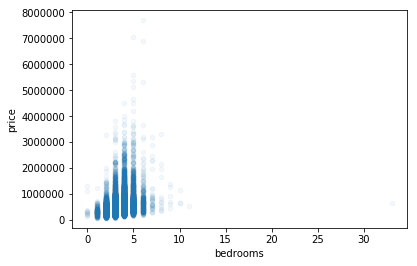

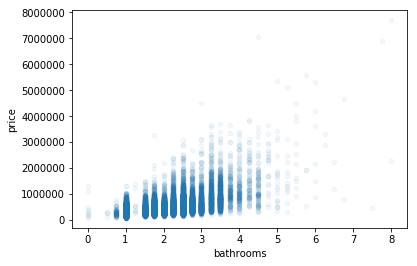

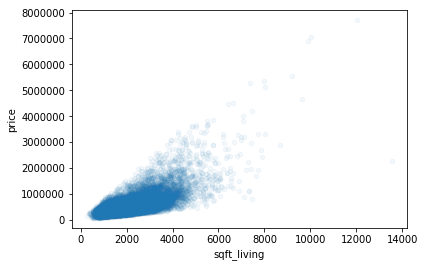

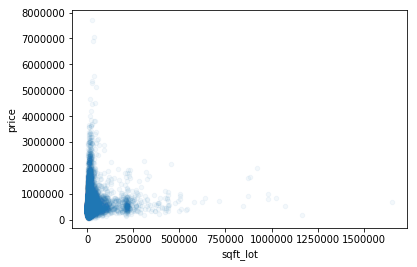

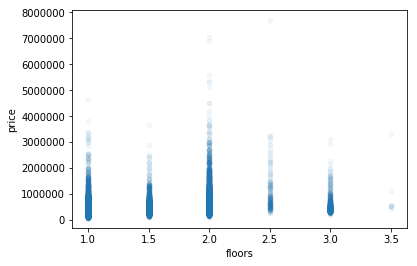

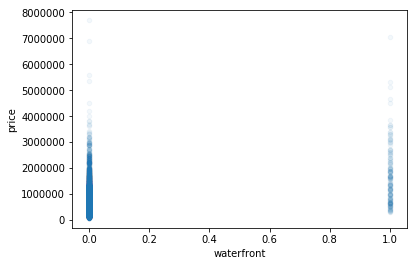

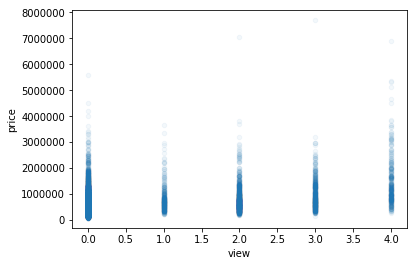

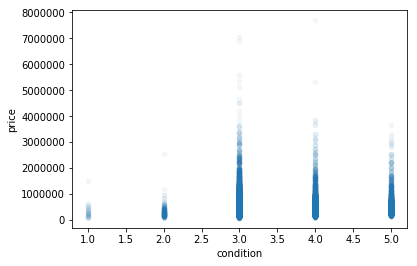

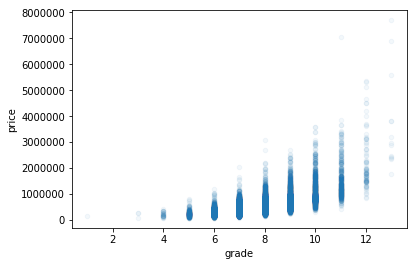

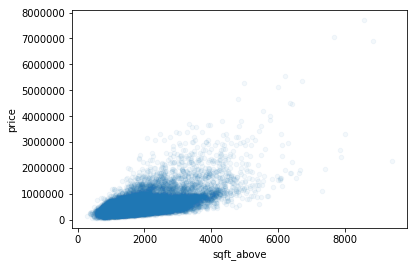

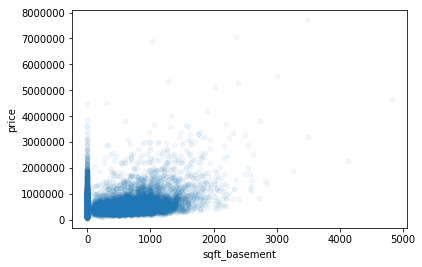

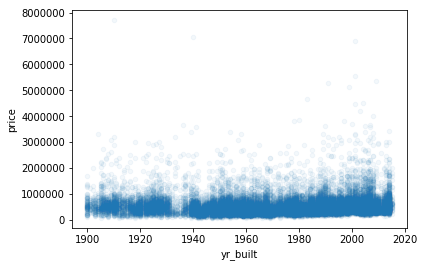

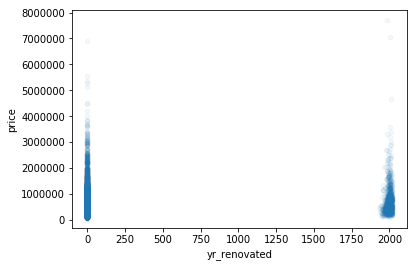

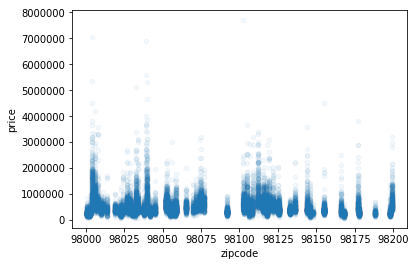

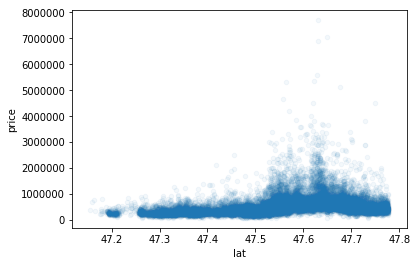

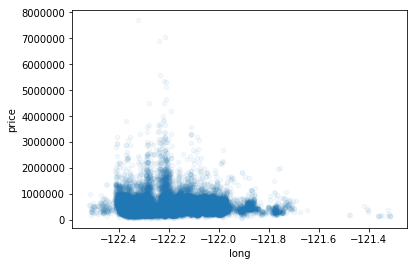

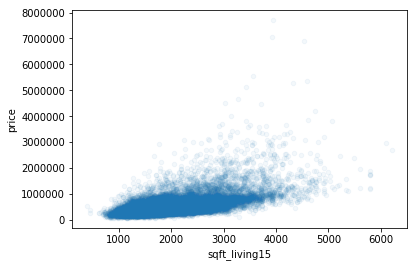

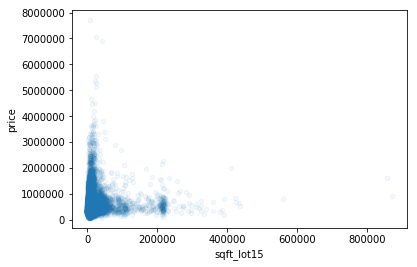

In [145]:
# 目的変数"price"との相関を可視化
for c in df.columns:
    if c != 'price' :
        df[[c,'price']].plot(kind='scatter',x=c,y='price',alpha=0.05)

In [146]:
# sqft_lot、sqft_lot15には～22000に同様な弱い集積がある
# waterfrontはyes noの２値
# sqft_basement、yr_renovatedには0に強い集積がある
# priceは地域を示すlatitude, lat, zipcodeには依存性はありそうだが規則性はなさそう
# yearは2014年と2015年の2値

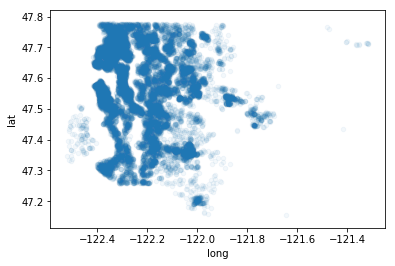

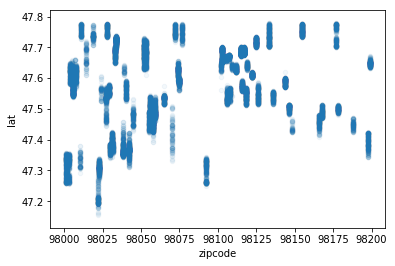

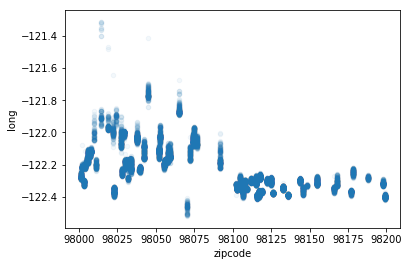

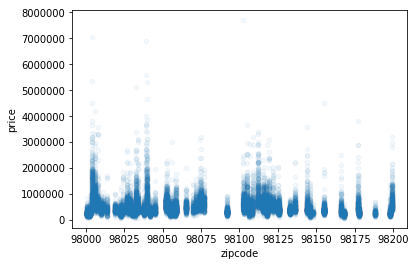

In [147]:
# 立地条件で価格が異なる。'long'か'lat'だけでは一意的に定まらないので説明変数には'zipcode'(郵便番号)が良いかもしれない。
df[['lat','long']].plot(kind='scatter',x='long',y='lat', alpha=0.05)
df[['lat','zipcode']].plot(kind='scatter',x='zipcode',y='lat', alpha=0.05)
df[['long','zipcode']].plot(kind='scatter',x='zipcode',y='long', alpha=0.05)
df[['price','zipcode']].plot(kind='scatter',x='zipcode',y='price', alpha=0.05)

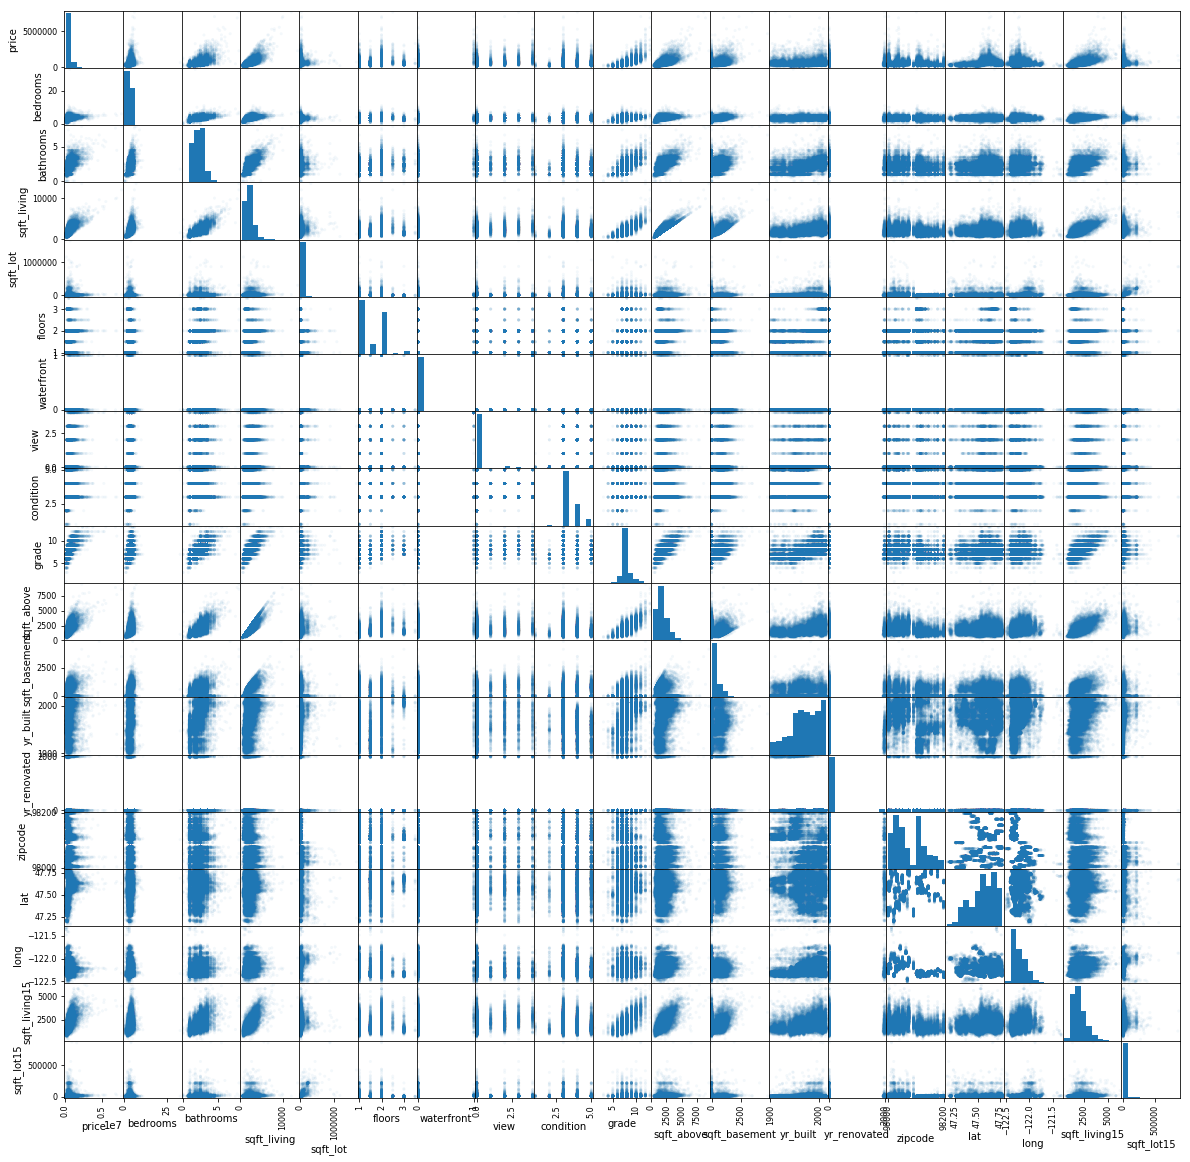

In [148]:
#　念のため相互の分布関係を確認　（調べましたが描画に時間がかかるので、次の2行はコメントアウトする場合があります）
pd.plotting.scatter_matrix(df, alpha=0.05, figsize=(20,20))
plt.show()

In [149]:
# yr_renovated再確認
# df[['price','yr_renovated']].plot(kind='scatter',x='yr_renovated',y='price', alpha=0.05)

In [150]:
# yr_renovatedの0年のデータが不自然だったので、renovateしたかどうかのデータを加えておく
df['renovated'] = np.array(df['yr_renovated'] != 0)*1
df['renovated'].value_counts().sort_index()

0    20699
1      914
Name: renovated, dtype: int64

In [151]:
# 基礎集計のまとめ

In [152]:
# 学習・検証のための参考評価
# max依存性：Bedroom（5部屋程度が高い）、square_lotとsquare_lot15（5sqm弱が高い）、floor（2階建てが高い）、
# 　　　　　　condition（3が高い⇒嘘）、yr_built（2000年が高い⇒バブル？）、lat及びlong（丁度良い位置がある）
# 外れ値大：Bedroom, square_lot
# 安いレンジにsquare_lot大：作業場付き住宅？
# 依存性無し：basement
# 依存性強：Zipcode（立地分析要）
# 2段階：gradeはyr_lastwork1960年以前は下がる。
# 近年square_lotの大きい物件が増加している。
# Zipcodeの大きい土地は、square_lotとsquare_lot15が小さい
# yr_renovated0年のデータが不自然なので、renovateの有無の説明変数を追加

# 前処理

In [153]:
# zipcodeはカテゴリカル変数（名義特徴量）なのでOne Hot Encodingする
df['zipcode_str'] = df['zipcode'].astype(str).map(lambda x:'zip_'+x)
df = pd.concat([df,pd.get_dummies(df['zipcode_str'])],axis=1)

In [154]:
display(df.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# 各dataの属性の確認（元データのcolumn metadataでstringがfloatになっている）
# zipcodeのone hot vector が多いので必要な時だけ次行で確認します
# print(df.dtypes)

In [156]:
# 重複データを破棄する
df = df.drop(['zipcode','zipcode_str'],axis=1)

In [157]:
# VIFの計算（出力が長いですが、説明変数削除根拠提示のためprintします）
from sklearn.linear_model import LinearRegression
df_vif = df.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared >= np.sqrt(0.9):
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])
        print()

bedrooms : 1.203290846812843
bathrooms : 2.0033969136391847


C:\Users\Toshio\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


sqft_living : inf
sqft_living Index(['sqft_above', 'sqft_basement'], dtype='object')

sqft_lot : 1.3871324203072688
floors : 1.534356366381452
waterfront : 1.042822139139916
view : 1.1300824385610584
condition : 1.0625264593011683
grade : 2.1971049934791242
sqft_above : inf
sqft_above Index(['sqft_living', 'sqft_basement'], dtype='object')

sqft_basement : inf
sqft_basement Index(['sqft_living', 'sqft_above'], dtype='object')

yr_built : 1.821729256607022
yr_renovated : 8110.835978783693
yr_renovated Index(['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement', 'lat',
       'renovated', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', '

zip_98006 : inf
zip_98006 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98023 : inf
zip_98023 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98034 : inf
zip_98034 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98055 : inf
zip_98055 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98077 : inf
zip_98077 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98112 : inf
zip_98112 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98126 : inf
zip_98126 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177',
       'zip_98178', 'zip_98188', 'zip_

zip_98177 : inf
zip_98177 Index(['zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144',
       'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98168',
       'zip_98178', 'zip_98188', 'zip_

In [158]:
(df['sqft_living']-df['sqft_above']-df['sqft_basement']).value_counts().sort_index()

0    21613
dtype: int64

In [159]:
# zipcode間で相補的になっているので一つ取り除く
# sqft-living = sqft_above + sqft_basementになっており、独立ではないのでsqft-livingを取り除く
# latは2次元位置情報として'zipcode'と'long'重複しているので、多重共線性評価値のより高い'lat'を取り除く
# yr_renovatedとyr_builtに多重共線性がみられるので、yr_renovatedを取り除く

In [160]:
#VIFの計算
from sklearn.linear_model import LinearRegression
df = df.drop(['sqft_living','zip_98198','lat','yr_renovated'],axis=1)
df_vif = df.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared >= np.sqrt(0.9):
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])
        #print

long Index(['zip_98045'], dtype='object')


In [161]:
# 'long'が'zip_98045'と多重共線性を残存している
# やはり立地条件が重複していると判断し'long'を削除してVIFを確認する

In [162]:
#VIFの計算
from sklearn.linear_model import LinearRegression
df = df.drop(['long'],axis=1)
df_vif = df.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared >= np.sqrt(0.9):
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])
        #print

# 以上で多重共線性を解消

In [163]:
# 標準化の逆算のためのパラメータの抽出

In [164]:
df_dscrb_prm=df.describe()
df_stc = df_dscrb_prm.loc['std','price']/1000000

In [165]:
display(df_dscrb_prm)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98199
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,...,0.015870,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.014667
std,3.671272e+05,0.930062,0.770163,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,...,0.124976,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.120219
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
# 次は、
# 標準化DataFrameを作成する
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
dfe_array=stdsc.fit_transform(df)
dfe=pd.DataFrame(dfe_array,columns=df.columns,index=df.index)

In [167]:
display(dfe.head(10))

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98199
0,-0.866717,-0.398737,-1.447464,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,9.027312,-0.079576,-0.122006
1,-0.005688,-0.398737,0.175607,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
2,-0.980849,-1.473959,-1.447464,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
3,0.174090,0.676485,1.149449,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
4,-0.081958,-0.398737,-0.149007,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
5,1.865641,0.676485,3.097133,2.096185,-0.915427,-0.087173,-0.305759,-0.629187,2.844170,2.537955,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
6,-0.769746,-0.398737,0.175607,-0.200098,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.088628,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
7,-0.676180,-0.398737,-0.798235,-0.130276,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.879623,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
8,-0.846016,-0.398737,-1.447464,-0.184381,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.891699,...,-0.126988,8.604949,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006
9,-0.591330,-0.398737,0.500221,-0.206351,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.122706,...,-0.126988,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.122006


# 特徴量エンジニアリング

In [168]:
# 目的：目標変数priceの説明変数による線形回帰
X = dfe.drop(['price'],axis=1)
y = dfe['price']
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)
# 比較基準にする
X0=X
y0=y
regr0=regr
regr0_score=regr0.score(X0,y0)

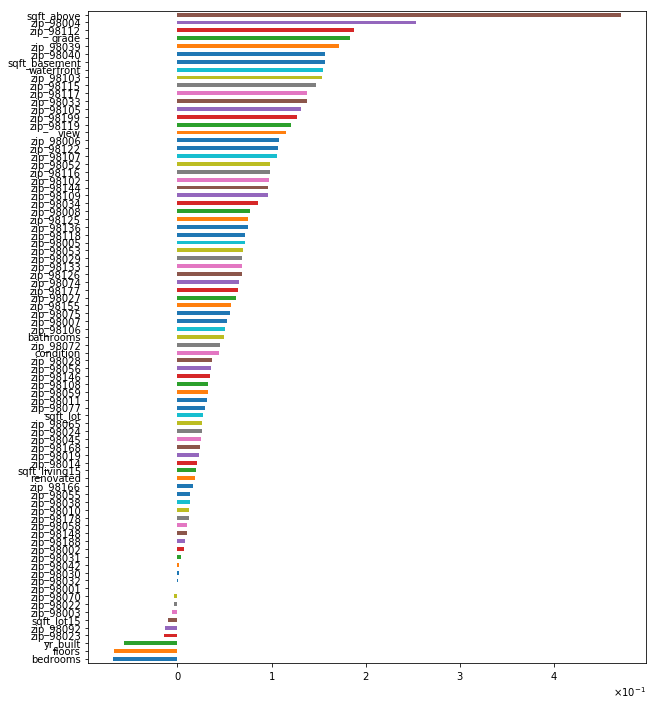

In [169]:
# 線形回帰を実施し、係数の大きい順番に棒グラフで可視化
from matplotlib.ticker import ScalarFormatter
ax = pd.Series(regr.coef_,index=X.columns).sort_values()\
  .plot(kind='barh',figsize=(10,12))
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

In [170]:
# 数値確認済（必要な時は次行で確認）
# pd.Series(regr.coef_,index=X.columns).sort_values()

In [171]:
# 係数に見るまとめ
#  立地条件（地域）はZipcodeでみることができる
#  立地条件以外のプライオリティは
#  sqft_above(広さの目安) > grade（家のquality）> sqft_basement（わざわざ地下室を作るほどの家）
#  > water_front（立地条件の中でも水辺は別格）> view（同じ施設・同じ立地なら景色の良いほうが上）
#  > bathrooms（風呂の数は余裕の表れ）> condition（やはり程度は大切）
#  逆にマイナスファクターは、yr_built, floors, bedrooms（ひょっとして古い大型の集団住居では？）

In [172]:
# yr_build, floors, bedroomsの係数が負はおかしいかも知れない

In [173]:
# 説明変数を順番に一通り削除することで改善されるデータがあるか確認する

In [174]:
# データ確認（長いので必要な時だけ次行を使用）
# for c in df.columns:
#    if c != 'price' :
#        df[[c,'price']].plot(kind='scatter',x=c,y='price',alpha=0.05)

In [175]:
#display (dfe)
for cname in dfe.columns:
        X = dfe.drop([cname,'price'],axis=1)
        y = dfe['price']
        regr = LinearRegression(fit_intercept=True)
        regr.fit(X, y)
        print("Original score: ","{:.10f}".format(regr0_score),\
        "   New score: ","{:.10f}".format(regr.score(X,y)),\
        "   Improvement:","{:.10f}".format(regr.score(X,y)-regr0_score),\
        "   ",cname,)

Original score:  0.8080945687    New score:  0.8080945687    Improvement: 0.0000000000     price
Original score:  0.8080945687    New score:  0.8053846364    Improvement: -0.0027099323     bedrooms
Original score:  0.8080945687    New score:  0.8073907990    Improvement: -0.0007037697     bathrooms
Original score:  0.8080945687    New score:  0.8077469685    Improvement: -0.0003476003     sqft_lot
Original score:  0.8080945687    New score:  0.8062295224    Improvement: -0.0018650463     floors
Original score:  0.8080945687    New score:  0.7888744423    Improvement: -0.0192201265     waterfront
Original score:  0.8080945687    New score:  0.7992781413    Improvement: -0.0088164274     view
Original score:  0.8080945687    New score:  0.8065957587    Improvement: -0.0014988101     condition
Original score:  0.8080945687    New score:  0.7992698867    Improvement: -0.0088246820     grade
Original score:  0.8080945687    New score:  0.7658623463    Improvement: -0.0422322225     sqft_abo

Original score:  0.8080945687    New score:  0.8080169671    Improvement: -0.0000776016     zip_98178
Original score:  0.8080945687    New score:  0.8080489506    Improvement: -0.0000456182     zip_98188
Original score:  0.8080945687    New score:  0.8006129598    Improvement: -0.0074816090     zip_98199


In [176]:
# 削除をしてscoreが上昇する（Improvement>0）説明変数はないので、この時点では不要な説明変数は無いと判断
# 線形回帰では　regression scoreは0.8080945687

# 正則化を検討してみる

In [177]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
print("Ridge")
al=[100,10,1,0.1,0.01,0.001,0.0001]
i=0
for alv in al:
    X = dfe.drop(['price'],axis=1)
    y = dfe['price']
    regr = Ridge(fit_intercept=True, alpha=al[i]).fit(X,y)
    i=i+1
    print("regression score: ",regr.score(X,y))

Ridge
regression score:  0.8078316230136398
regression score:  0.8080902516042817
regression score:  0.8080945229442767
regression score:  0.808094568275229
regression score:  0.8080945687312947
regression score:  0.8080945687358582
regression score:  0.8080945687359038


In [178]:
# Ridge正則化のregression scoreは、alpha= 1でほぼ飽和, 線形回帰と同様

In [179]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
print("Lasso")
al=[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
i=0
for alv in al:
    X = dfe.drop(['price'],axis=1)
    y = dfe['price']
    regr = Lasso(fit_intercept=True, alpha=al[i]).fit(X,y)
    i=i+1
    print("regression score: ",regr.score(X,y))

Lasso
regression score:  0.0
regression score:  0.6390066911200474
regression score:  0.7968434790468977
regression score:  0.8072583310213265
regression score:  0.808067612381078
regression score:  0.8080942106292212
regression score:  0.8080945651545962


In [180]:
# Lassoのregression scoreは、alpha= 0.00001でほぼ飽和, 線形回帰と同様

# 交差検証

In [181]:
# 授業の方法：線形回帰

In [182]:
# トレインテスト分割を授業で習った方法でやってください。
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
X = dfe.drop(['price'],axis=1)
y = dfe['price']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [183]:
print("*linear regression")
lr = LinearRegression().fit(X_train, y_train)
print("Train set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score : {:.4f}".format(lr.score(X_test, y_test)))

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE= %s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*linear regression
Train set score: 0.8133
Test set score : 0.7911
MSE= 0.03
RMSE=0.172
MAE =0.095


In [184]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
print("*Lasso")
llr = linear_model.Lasso(alpha=0.00001).fit(X_train, y_train)
print("Train set score: {:.4f}".format(llr.score(X_train, y_train)))
print("Test set score : {:.4f}".format(llr.score(X_test, y_test)))

y_pred = llr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE= %s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*Lasso
Train set score: 0.8133
Test set score : 0.7911
MSE= 0.03
RMSE=0.172
MAE =0.095


In [185]:
from sklearn.linear_model import Ridge
print("*Ridge")
lrr = linear_model.Ridge (alpha = 1).fit(X_train, y_train)
print("Train set score: {:.4f}".format(lrr.score(X_train, y_train)))
print("Test set score : {:.4f}".format(lrr.score(X_test, y_test)))

y_pred = lrr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE= %s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*Ridge
Train set score: 0.8133
Test set score : 0.7911
MSE= 0.03
RMSE=0.172
MAE =0.095


In [186]:
# モデルにかかわらず同様な結果。

# k分割交差検証　（k=5）

In [187]:
# 検証対象データ（再掲）
X = dfe.drop(['price'],axis=1)
y = dfe['price']

In [188]:
# Lassoによる交差検証　cv=5

In [189]:
from sklearn.model_selection import train_test_split, GridSearchCV
# X, y = df_en_fin.iloc[:,1:].values, df_en_fin['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
param_grid = {'alpha':[1e-4,1e-3, 1e-2, 1e-1]}
cv = GridSearchCV(Lasso(),param_grid=param_grid,cv=5)

cv.fit(X_test,y_test)
cv.best_params_
cv.cv_results_
print("*K-Fold Lasso cross validation")

*K-Fold Lasso cross validation


In [190]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("*K-Fold Lasso cross validation")
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*K-Fold Lasso cross validation
MSE =0.024
RMSE=0.156
MAE =0.093


In [191]:
# Rdidgeによる交差検証　cv=5

In [192]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
param_grid = {'alpha':[1e-2, 1e-1, 1e0, 1e1, 1e2]}
cv = GridSearchCV(Ridge(),param_grid=param_grid,cv=5)
cv.fit(X_test,y_test)

cv.fit(X_test,y_test)
cv.best_params_
cv.cv_results_
print("*K-Fold Rdige cross validation")

*K-Fold Rdige cross validation


In [193]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

MSE =0.024
RMSE=0.156
MAE =0.093


In [194]:
# Lasso、Ridgeのモデルによらず、k分割交差検証（k=5）の結果はほぼ同じ

# 具体的に異常データを確認してみる（y_predict - y_test）

In [195]:
# 参照・比較するため異常データ操作前の確認
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
param_grid = {'alpha':[1e-4,1e-3, 1e-2, 1e-1]}
cv = GridSearchCV(Lasso(),param_grid=param_grid,cv=5)

cv.fit(X_test,y_test)
cv.best_params_
cv.cv_results_
print("*K-Fold Lasso cross validation")

*K-Fold Lasso cross validation


In [196]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

MSE =0.024
RMSE=0.156
MAE =0.093


In [197]:
# priceのテストデータと回帰結果データ間の不一致の分布をプロットで確認
dfp=X_test

C:\Users\Toshio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


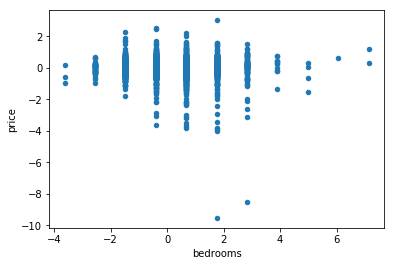

In [198]:
# priceのテストデータと回帰結果データ間の不一致の分布をプロットで確認
dfp=X_test
dfp['price']=y_pred-y_test

# for c in dfp.columns:
#    if c != 'price' :
#        dfp[[c,'price']].plot(kind='scatter',x=c,y='price')

# 上式で全て確認したが、長いので１つ例示
dfp[['bedrooms','price']].plot(kind='scatter',x='bedrooms',y='price')

In [199]:
# price<-8に以上データが2つ存在 => price < -7を取り除いてみる
dfp=X_test
dfp['price']=y_pred-y_test
dfp=dfp[dfp['price'].map(lambda x: x>-7)]

C:\Users\Toshio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


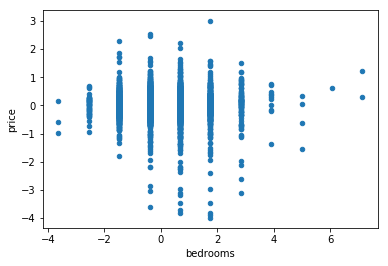

In [200]:
# priceの不一致の分布をプロットで確認（データ数が多いので表示はスキップ。確認済み）
# for c in dfp.columns:
#     if c != 'price' :
#        dfp[[c,'price']].plot(kind='scatter',x=c,y='price')

# 上式で全て確認したが、長いので１つ例示
dfp[['bedrooms','price']].plot(kind='scatter',x='bedrooms',y='price')

In [201]:
# 異常データが解消された
# 交差検証で異常データ削除後の評価を実施する

# 異常データ除去後に再度学習チェック

In [202]:
#　異常データ（price<-5：21612個のデータで1個出現する確率0.6％）を削除し、Lasso k分割交差検証（k=5）を実施
dfe=dfe[dfe['price'].map(lambda x: x>-5)]

In [203]:
# 検証対象データ（再掲）
X = dfe.drop(['price'],axis=1)
y = dfe['price']

In [204]:
from sklearn.model_selection import train_test_split, GridSearchCV
# X, y = df_en_fin.iloc[:,1:].values, df_en_fin['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
param_grid = {'alpha':[1e-4,1e-3, 1e-2, 1e-1]}
cv = GridSearchCV(Lasso(),param_grid=param_grid,cv=5)

cv.fit(X_test,y_test)
cv.best_params_
cv.cv_results_
print("*K-Fold Lasso cross validation")

*K-Fold Lasso cross validation


In [205]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

MSE =0.024
RMSE=0.156
MAE =0.093


In [206]:
# 結果は変わっていないので、異常データが統計的に影響しているわけではないことが解った。

# まとめ1

In [207]:
# 実施事項

In [208]:
# kc_house_data.csvをKaggleのアカウントをとりダウンロード

In [209]:
# 基礎集計を実施
#  data属性を確認 => 後でdateを数値化したところ変数と相関が無いことを確認し削除
#  data欠損の無いことを確認（=> Nanの除去を形式的に実施、結果のデータ数は不変）
#  元々stringであった変数の分布・頻度を確認
#  各変数の相関を確認
#  各変数に対する特徴を言語化（モデル評価の際の参考のため）

In [210]:
# 目的変数と説明変数の選択
#  目的変数を"price", 説明変数をその他の変数とする。（各種データから価格を予想する）
#  目的変数"price"との相関を可視(グラフ)化
#  priceは地域を示すlatitude, lat, zipcodeには依存性はありそうだが規則性はなさそう
#  ⇒立地条件で価格が異なるがlongやlatでは一意的に定まらないのでzipcode(郵便番号)が良いかもしれないと判断
#  ⇒この時点ではlongとlatの削除はせず
#　yr_renovatedは年のデータと改修の有無のデータの要素があったので、改修の有無のデータ（renovated(0 or 1)に分離

In [211]:
# 前処理

In [212]:
# zipcodeはカテゴリカル変数（名義特徴量）なのでOne Hot Encodingする
# zipcodeに関する重複データを削除
# VIFを計算（多重共線性の高い以下のdataを削除）
#　zipcode間で相補的になっているので一つ取り除く
#  sqft-living = sqft_above + sqft_basementになっているものが多く、独立ではないのでsqft-livingを取り除く
#  latは2次元位置情報としてzipcodeとlong重複しているので、多重共線性評価値の高いlatを取り除く
#　yr_renovatedとyr_builtに多重共線性がみられるので、yr_renovatedを取り除く
# VIFを再計算したところ、longがzip_98045と多重共線性を残存しているので、longを削除
# VIF計算により多重共線性を解消を確認
# dataを標準化（標準化の際に価格の100万ドルを単位として標準偏差を求める⇒MSE、RMSE、MAE評価の際に使用）

In [213]:
# 特徴量エンジニアリング

In [214]:
# 線形回帰を実施し係数を算出
# 係数の大きい順番に棒グラフで可視化
# 係数に見るまとめ
#  立地条件（地域）はZipcodeでみることができる
#  立地条件以外のプライオリティは
#  sqft_above(広さの目安) > grade（家のquality）> sqft_basement（わざわざ地下室を作るほどの家）
#  > water_front（立地条件の中でも水辺は別格）> view（同じ施設・同じ立地なら景色の良いほうが上）
#  > bathrooms（風呂の数は余裕の表れ）> condition（やはり程度は大切）
# yr_build, floors, bedroomsの係数が負はおかしいかも知れないのでそれぞれを削除したが、scoreは改善せず
# その他の説明変数を全てそれぞれ削除して回帰したがscoreは改善せず
# ⇒この時点で、必要十分な説明変数を選択しているものと結論
# 正則化（Lasso）を検討したが、scoreは改善せず同程度であることを確認⇒過学習が無いことを示唆している

In [215]:
# 交差検証

In [216]:
# k分割交差検証でMSE,RSME,MAEが改善（標準化の際に算出した標準偏差を用い100万ドル単位で記載）
# k分割交差検証（k=5）を線形回帰・Ridge・Lassoで実施
# いずれも
# score～0.808
# MSE ～0.024
# RMSE～0.156
# MAE ～0.093
# とモデル間の差はなかった。(priceを$1Mで換算）
# 得られたパラメーターは、Lassoでは 0.0001、Ridgeでは10.0

In [217]:
# 感想

In [218]:
# モデル間で結果に差が出なかったので、正しく評価できているのかという疑問があります。
# また、(プログラム自体は動作しているのですが)エラーメッセージへの適切な対応が課題と感じています。
# とりあえず、前回よりscore値が良くなったのでほっとしています。

In [219]:
# 以上で終了です（アドバイスに従い、回帰木で評価）

# 回帰木を用いた回帰のk分割交差検証　（k=5）

In [220]:
#　以下は　Day2_workの2回目提出

In [221]:
# 検証対象データ（再掲）
X = dfe.drop(['price'],axis=1)
y = dfe['price']

In [222]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
param_grid = {'max_depth':[4,5,6,7]}
cv = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=5)

cf=cv.fit(X_test,y_test)
cb=cv.best_params_
cr=cv.cv_results_
print("*K-Fold DecisionTreeRegressor cross validation")
print("fit    ", cf)
print("best   ", cb)
print("results", cr)

*K-Fold DecisionTreeRegressor cross validation
fit     GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
best    {'max_depth': 6}
results {'mean_fit_time': array([0.02003827, 0.02351098, 0.0270946 , 0.03005781]), 'std_fit_time': array([0.00024254, 0.000865  , 0.00059279, 0.0005949 ]), 'mean_score_time': array([0.00079403, 0.00099473, 0.00089383, 0.00059485]), 'std_score_time': array([0.00024302, 0.00044736, 0.00021435, 0.00019896]), 'param_max_depth': masked_array(data=[4, 5, 6, 7],
    

In [223]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

MSE =0.032
RMSE=0.178
MAE =0.125


In [224]:
#　k分割交差検証（k=5）の高評価パラメーターについてScoreを用いて過学習を検証

In [225]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
print("*Dicision Tree")
Dtr = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)
print("Train set score: {:.4f}".format(Dtr.score(X_train, y_train)))
print("Test set score : {:.4f}".format(Dtr.score(X_test, y_test)))

y_pred = Dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE= %s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*Dicision Tree
Train set score: 0.7386
Test set score : 0.5914
MSE= 0.053
RMSE=0.23
MAE =0.137


In [226]:
# MSE、RMSE、MAEは改善されているが、scoreは悪い。特にtestデータが良くない⇒過学習？

# Support Vector Machineを用いた回帰のk分割交差検証　（k=5）

In [227]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

param_grid = {'degree':[1,2,4,7]}
cv = GridSearchCV(SVR(),param_grid=param_grid,cv=5)

cf=cv.fit(X_test,y_test)
cb=cv.best_params_
cr=cv.cv_results_
print("*Support Vector Machine cross validation")
print("fit    ", cf)
print("best   ", cb)
print("results", cr)

*Support Vector Machine cross validation
fit     GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'degree': [1, 2, 4, 7]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
best    {'degree': 1}
results {'mean_fit_time': array([2.2088912 , 2.21443791, 2.21424069, 2.20174932]), 'std_fit_time': array([0.03383135, 0.05311053, 0.04423359, 0.0312716 ]), 'mean_score_time': array([0.41276426, 0.41226902, 0.41219044, 0.41256595]), 'std_score_time': array([0.00470892, 0.00472357, 0.00378182, 0.00449973]), 'param_degree': masked_array(data=[1, 2, 4, 7],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'degree': 1}, {'degree': 2}, {'degree': 4}, {'degree': 7}], 'split0_test_sco

In [228]:
y_pred = cv.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE =%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

MSE =0.023
RMSE=0.152
MAE =0.065


In [229]:
#　k分割交差検証（k=5）の高評価パラメーターについてScoreを用いて過学習を検証

In [230]:
from sklearn import linear_model
from sklearn.svm import SVR
print("*Support Vector Regression")
Svr = SVR(degree=1).fit(X_train, y_train)
print("Train set score: {:.4f}".format(Svr.score(X_train, y_train)))
print("Test set score : {:.4f}".format(Svr.score(X_test, y_test)))

y_pred = Svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("MSE= %s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE =%s"%round(mae,3) )

*Support Vector Regression
Train set score: 0.8579
Test set score : 0.8123
MSE= 0.024
RMSE=0.156
MAE =0.072


In [231]:
# 若干過学習気味だが、これまでで一番良い評価（但し計算時間がかなり長い）

# まとめ２

In [232]:
# 講師の助言を受け
# ①　MSE、RMSE、MAEを100万ドル単位で表記
# ②　アルゴリズム（Support Vector Machine（SVM）回帰、回帰木）を用いて、改善の可能性放評価。

In [233]:
# ①　線形回帰・Ridge・Lassoで実施及び交差検証・k分割交差検証を実施(再掲)
# k分割交差検証がMSE,RSME,MAEが改善（標準化の際に算出した標準偏差を用い100万ドル単位で記載）
# k分割交差検証（k=5）を線形回帰・Ridge・Lassoで実施
# いずれも
# score～0.808
# MSE ～0.024
# RMSE～0.156
# MAE ～0.093
# とモデル間の差はなかった。(priceを$1Mで換算）
# 得られたパラメーターは、Lassoでは 0.0001、Ridgeでは10.0

In [234]:
# ② SVM回帰、回帰木で改善について評価
# SVM回帰で改善が見られ、多少過学習があるかもしれないが、best score 81以上、MSE= 0.024、RMSE=0.156、MAE =0.072を得た。
# 回帰木では、MSE、RMSE、MAEは改善されたが、best scoreのパラメータで、大きな過学習が見られた。

In [235]:
# 結論
# 適切に特徴量エンジニアリングを行うと、線形回帰ベースの回帰（線形回帰、Lasso、Ridge）では安定な最適化が実現できた。
# SVMアルゴリズムを導入すると、計算時間はかかるが、多少最適条件が改善されることを確認した。

In [236]:
# 感想
# コメントをいただいた後急いで追記しましたので、とりあえず計算した感じですが、
# モデルによっても結果が変わることが確認でき良かったと思います。
#
# 若杉様、有難うございました。
#
# 以上です。